In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')


In [31]:
mercado_df = pd.read_csv("C://Flavio/Projeto Otimizacao/Modelo Mercado/data_consolidado_final_jun24.csv",
                     encoding='latin-1',
                     delimiter=';')
mercado_df.shape

(96586, 36)

In [3]:
mercado_df = mercado_df[(~mercado_df.Grupo_veiculo_new.isin(['ARRIZO',
'Chery Passeio',   'Chery Tiggo'   , 'Erro'  ,'Kia Cerato','Kia Picanto' ,'Kia Sorento'  ,'Kia Soul' ,
'Kia Sportage'  ,'Rio']))]

mercado_df = mercado_df[(~mercado_df.fabrica.isin(['BYD','CAOA CHERY','GWM','KIA MOTORS','LEXUS']))]

mercado_df = mercado_df[(~mercado_df.idade_ult_RNS.isin(['_03 ou+ anos']))]
mercado_df.shape

(93838, 36)

In [32]:
df_mod=mercado_df[["premio_total_liq_cap","ano_mod_conv","classe_bonus",
                   "idade","is_casco","is_dmoral","is_rcdc","is_rcdm",
                   "RNS_Casco_calc",
                   "Grupo_veiculo_new", "fabrica","idade_ult_RNS","md_categoria",
                   "MD_comb","md_config","MD_franquia","md_menor26","md_sexo",
                   "MD_Subzona","md_tipo_renov","MD_uso_veic","uf"]]

df_mod.rename(columns={'premio_total_liq_cap':'premio_ofertado', 'ano_mod_conv': 'ano_mod'},inplace=True)

In [33]:
x_df_num = df_mod[['ano_mod', 'classe_bonus', 'idade', 'is_casco', 'is_dmoral', 'is_rcdc', 'is_rcdm', 'RNS_Casco_calc']]
x_df_num = x_df_num.fillna(0)
x_df_cat = df_mod[['Grupo_veiculo_new', 'fabrica', 'idade_ult_RNS', 'md_categoria', 'MD_comb', 'md_config', 'MD_franquia', 'md_menor26', 'md_sexo', 'MD_Subzona','md_tipo_renov', 'MD_uso_veic','uf']]
y   = df_mod[['premio_ofertado']]
#x_df_cat_ordinal = encoder.fit_transform(x_df_cat)
#x_df_cat_ordinal = pd.DataFrame(x_df_cat_ordinal)
x_df_dummy=pd.get_dummies(x_df_cat)
#x_df=pd.concat([x_df_num, x_df_cat_ordinal],axis=1)
x_df=pd.concat([x_df_num, x_df_dummy],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.2) 

In [34]:
x_df.shape

(96586, 535)

In [7]:
#x_df.columns.to_list()

In [8]:
x_df_num.columns[x_df_num.isnull().any()]

Index([], dtype='object')

In [9]:
x_df_cat.columns[x_df_cat.isnull().any()]

Index([], dtype='object')

%%time
from sklearn.ensemble import GradientBoostingRegressor
# inicia o modelo GBM
gbm = GradientBoostingRegressor(n_estimators=100,
                                max_leaf_nodes=32,
                                learning_rate=0.1, 
                                random_state=42)

# Treina o modelo
gbm.fit(x_train, y_train)

# previsão
y_pred = gbm.predict(x_test)

# Evaluate the model

print("Premio Estimado Médio: %.2f" % np.mean(y_pred) )
# checando a acurácia
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

In [ ]:
#import pickle
# saving
#model_pkl_file = "mercado_model.pkl"  
#with open(model_pkl_file, 'wb') as file:  
#pickle.dump(gbm, file)

In [ ]:
# load model from pickle file
#with open(model_pkl_file, 'rb') as file:  
#model = pickle.load(file)

In [ ]:
#model = pickle.load(open("mercado_model", "rb"))

In [ ]:
#cols_when_model_builds = gbm.get_booster().feature_names

In [35]:
import lightgbm as lgb
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'n_estimators':100,
    'num_leaves': 50,
    'min_depth': 5,
    'max_depth': 5,
    'learnnig_rage': 0.1,
    'metric': {'l2','l1'},
    'verbose': -1
}

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval  = lgb.Dataset(x_test, y_test, reference=lgb_train)

model_gbm = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)

y_pred = model_gbm.predict(x_test)
print("Premio Estimado Médio: %.2f" % np.mean(y_pred) )
# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

Premio Estimado Médio: 2634.20
MSE: 576950.37
RMSE: 759.57


## modelagem GLM

In [36]:
%%time
df_mod_mp_feb23may24_v3 = pd.read_csv("C://Flavio/Projeto Otimizacao/Modelo Renovacao/df_mod_mp_feb23may24_v3.csv",
                     encoding='latin-1',
                     delimiter='|')

df_mod_mp_feb23may24_v3.shape

CPU times: total: 6.02 s
Wall time: 7.08 s


(571594, 105)

In [12]:
df_mod_mp_feb23may24_v3.shape

(571594, 105)

In [176]:
#df_mod_mp_feb23may24_v3.columns.to_list()

In [13]:
df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.Grupo_veiculo_new.isin(['BWM X',
'Blindados',
'Chevrolet Astra Sedan',
'Chrysler Passeio',
'Citroen Antigo',
'Citroen Xsara Picasso',
'Dodge Journey',
'Esportivo Porsche',
'Fiat ANTIGOS',
'Fiat Ducato',
'Fiat Ducato Furgao',
'Fiat Palio Antigo',
'Fiat Stilo',
'Ford Sedans Antigos',
'Hyundai Sonata',
'Hyundai Veloster',
'Hyundai Vera Cruz',
'IEV',
'JAC J2',
'JAC J3 Hatch',
'JAC J3 Sedan',
'JAC T',
'Kia Sportage Antigo',
'Lifan Passeio',
'Lifan X',
'MB Classe B',
'MB Linha E',
'MB Linha S',
'MB Sprinter Furgão',
'MB Sprinter Van',
'Nissan Tiida',
'Peugeot 106/205/206',
'Peugeot Hoggar',
'Pickup Nacional',
'Smart Fortwo',
'Troller T-4',
'VW Bora',
'VW Gol 1.8',
'VW Kombi',
'VW Parati',
'VW Passat',
'VW Santana',
'VW Saveiro Antigo',
'Van Importada',
]))]

df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.FABRICA.isin(['CHERY',
'CHRYSLER','DEMAIS','DODGE','JAC MOTORS','KIA','LIFAN','PORSCHE','SMART','SSANGYONG','TROLLER']))]


df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.idade_ult_RNS.isin([
'03 anos','04 anos','05 anos','06 anos','07 anos','08 anos','09 anos','10 ou +']))]


df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.md_categoria.isin([
'Pickup Leve Importado']))]

df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.MD_franquia.isin([
'ERRO']))]

df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.MD_menor26.isin([
'ERR']))]

df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.MD_sexo.isin([
'ERRO']))]


df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.MD_Subzona.isin([
'88400-SERTAO PERNAMBUCANO']))]


df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.MD_uso_veic.isin([
'Aluguel e Frete',
'Ambulância',
'Bar/Lanchonete',
'ERRO',
'Escolares',
'Funerárias',
'Lotações',
'Transporte de Carga',
'Transporte de Funcionarios',
'Turismos',
]))]


df_mod_mp_feb23may24_v3 = df_mod_mp_feb23may24_v3[(~df_mod_mp_feb23may24_v3.UF.isin([
'ND',]))]


df_mod_mp_feb23may24_v3.shape


(377345, 105)

In [ ]:
#sp = df_mod_mp_feb23may24_v3[df_mod_mp_feb23may24_v3['UF'] == 'SP']


In [ ]:
#hilux = sp[sp['Grupo_veiculo_new'].isin(["Toyota Hilux CD","Toyota Hilux CS","Toyota Hilux SW4"])]

In [ ]:
#sp_sem_hilux = sp[~sp['Grupo_veiculo_new'].isin(["Toyota Hilux CD","Toyota Hilux CS","Toyota Hilux SW4"])]


parte para incluir o preço do mercado na base de modelagem glm

In [39]:
colunas=['premio_ofertado','ano_mod','classe_bonus','MD_idade','is_casco_ofer','is_dmoral','is_rcdc','is_rcdm','RNS_Casco_calc',
 'Grupo_veiculo_new','FABRICA','idade_ult_RNS', 'md_categoria','MD_comb','MD_config','MD_franquia','MD_menor26','MD_sexo','MD_Subzona',  
 'MD_tipo_renov','MD_uso_veic','UF','per_com','Renovacao_ant','MD_est_civil','peso','premio_total','vigencia','premio_creserva',
        'anomes_dt_ter','teste_validacao']


In [38]:
#df_escorar_gbm = df_mod_mp_feb23may24_v3.copy()

In [40]:
df_escorar_gbm=df_mod_mp_feb23may24_v3[colunas]
#df_escorar_gbm = df_mod_mp_feb23may24_v3.copy()

In [41]:
df_escorar_gbm.shape

(571594, 31)

In [42]:
df_escorar_gbm.rename(columns={'MD_idade':'idade', 
                                   'is_casco_ofer': 'is_casco',
                                   'FABRICA': 'fabrica',
                                   'MD_config':  'md_config',
                                   'MD_menor26': 'md_menor26',
                                   'MD_sexo': 'md_sexo',
                                   'UF': 'uf',
                                   'MD_tipo_renov':  'md_tipo_renov'},inplace=True)
df_escorar_gbm['idade'] = pd.to_numeric(df_escorar_gbm['idade'], errors='coerce')

In [46]:
df_num = df_escorar_gbm[['ano_mod', 'classe_bonus', 'idade', 'is_casco', 'is_dmoral', 'is_rcdc', 'is_rcdm', 'RNS_Casco_calc']]
x_df_num = x_df_num.fillna(0)
df_cat = df_escorar_gbm[['Grupo_veiculo_new', 'fabrica', 'idade_ult_RNS', 'md_categoria', 'MD_comb', 'md_config', 'MD_franquia', 'md_menor26', 'md_sexo', 'MD_Subzona','md_tipo_renov', 'MD_uso_veic','uf']]
df_cat_glm=pd.get_dummies(df_cat)
df_cat_glm=pd.concat([df_num, df_cat_glm],axis=1)
#GBM_mercado = gbm.predict(df_cat_glm, predict_disable_shape_check=True)

In [120]:
#df_cat_glm.columns.to_list()

In [140]:
#GBM_mercado = model_gbm.predict(df_cat_glm, predict_disable_shape_check=True)

In [47]:
GBM_mercado = model_gbm.predict(df_cat_glm, predict_disable_shape_check=True)
np.average(GBM_mercado)

4134.966483193934

In [48]:
df_escorar_gbm['GBM_mercado']=GBM_mercado
df_escorar_gbm.shape

(571594, 32)

#### prepara base de modelagem glm

In [51]:
%%time
df_mod_mp_feb23may24_v3 = pd.read_csv("C://Flavio/Projeto Otimizacao/Modelo Renovacao/df_mod_mp_feb23may24_v3.csv",
                     encoding='latin-1',
                     delimiter='|')

df_mod_mp_feb23may24_v3.shape

CPU times: total: 6.05 s
Wall time: 7.17 s


(571594, 105)

In [54]:
df_mod_mp_feb23may24_v3['GBM_mercado']=GBM_mercado
df_mod_mp_feb23may24_v3.shape

(571594, 106)

In [55]:
df_mod_filtered=df_mod_mp_feb23may24_v3[["premio_ofertado","premio_total",'GBM_mercado', 'premio_creserva','premio_demais_cob',"teste_validacao","ind_renovacao","MD_sexo","cod_corr",
                                "Cod_End","MD_sin_5a_cas","MD_tempo_casa_2","MD_idade_veic","MD_faixa_IScas",
                                "anomes_dt_ter" ,"MD_idade","per_com", "RNS_Casco_calc","MD_menor26","UF","Renovacao_ant",
                                "fx_ir_12m","is_casco_ofer","classe_bonus","MD_fator_ajuste","MD_capac","md_categoria",
                                "MD_comb","MD_qtd_assis_cpf", "idade_ult_RNS","canal","MD_tipo_renov",'FABRICA','MD_est_civil',
                                'peso','Grupo_veiculo_new','vigencia',
                                'Risco_PP_mod', 'Risco_PT_mod','Risco_RF_mod','Risco_DM_mod','Risco_AS_mod',
                                'Risco_DC_mod' ,'Risco_DMO_mod']]

In [56]:
df_mod_filtered = df_mod_filtered[df_mod_filtered['per_com'].notna()]
df_mod_filtered = df_mod_filtered[df_mod_filtered['Renovacao_ant'].notna()]
df_mod_filtered = df_mod_filtered[df_mod_filtered['MD_est_civil'].notna()]
df_mod_filtered = df_mod_filtered[df_mod_filtered['peso'].notna()]
df_mod_filtered = df_mod_filtered.query('premio_total !=0')
df_mod_filtered = df_mod_filtered.query('vigencia == "Anual"')
df_mod_filtered = df_mod_filtered.query('premio_creserva >= 0')
df_mod_filtered = df_mod_filtered[~df_mod_filtered['anomes_dt_ter'].isin([202310,202309,202308,202302,202402])]
df_mod_filtered = df_mod_filtered.query('is_casco_ofer > 0')
df_mod_filtered = df_mod_filtered[(df_mod_filtered['per_com']>0) & (df_mod_filtered['per_com']<50)]
df_mod_filtered = df_mod_filtered.query('premio_total >100')
df_mod_filtered = df_mod_filtered.query('MD_idade !="ERRO"')
df_mod_filtered = df_mod_filtered[(df_mod_filtered.UF != "SP") | (~df_mod_filtered.Grupo_veiculo_new.isin(["Toyota Hilux CD","Toyota Hilux CS","Toyota Hilux SW4"]))]
df_mod_filtered = df_mod_filtered[(df_mod_filtered.premio_ofertado/df_mod_filtered.premio_total <=2.3) &  (df_mod_filtered.premio_ofertado/df_mod_filtered.premio_total>=0.7)]

df_mod_filtered.shape

(358297, 44)

In [ ]:
#df_mod_filtered['classe_bonus'].describe()

In [ ]:
#print(df_mod_filtered['classe_bonus'].value_counts(ascending=False))

In [57]:
df_mod_filtered['DA_emissao'] =0.2349
df_mod_filtered['DA_producao'] =0.2749
df_mod_filtered['risco_dmais_cob'] =df_mod_filtered['premio_demais_cob']*0.2627*1.4
df_mod_filtered['premio_anterior'] =df_mod_filtered['premio_total']
df_mod_filtered['Act_cost']  = df_mod_filtered['Risco_PP_mod'] + df_mod_filtered['Risco_PT_mod'] + df_mod_filtered['Risco_RF_mod']+ df_mod_filtered['Risco_DM_mod']+ df_mod_filtered['Risco_AS_mod'] + df_mod_filtered['Risco_DC_mod'] +df_mod_filtered['Risco_DMO_mod'] + df_mod_filtered['risco_dmais_cob']
df_mod_filtered['Premio_IC100']  = df_mod_filtered['Act_cost']/(1-df_mod_filtered['per_com']/100-df_mod_filtered['DA_producao'] )
df_mod_filtered["premio"] = df_mod_filtered["premio_ofertado"]

In [58]:
np.mean(df_mod_filtered['Premio_IC100'])

3028.7706417893046

In [59]:
df_mod=df_mod_filtered.copy()

In [60]:
def categorizar(df):
    
    df['classe_bonus_bin'] = df['classe_bonus'].apply(lambda x: '00'  if x == 0 else 'Demais')   
    
    df['MD_sexo_bin'] = df['MD_sexo'].map({'Masculino': 'Masculino', 
                                 'Feminino': 'Feminino', 
                                  'ERRO': 'Masculino'}).astype(object)
    
    df['MD_sexo_2bin'] = df['MD_sexo'].map({'Masculino': 1, 
                                 'Feminino': 0, 
                                  'ERRO': 1}).astype(int)


    df['fx_ir_12m_bin'] = df['fx_ir_12m'].apply(lambda x: '01 - 00-<=020' if x == '01 - 00-<=020' else
                                                              '02 - 20-<=040' if x == '02 - 20-<=040' else
                                                              '03 - 40-<=060' if x == '03 - 40-<=060' else
                                                              '04 - 60-<=080' if x == '04 - 60-<=080' else
                                                              '05 - 80-<=100' if x == '05 - 80-<=100' else
                                                              '02 - 20-<=040' if x == 'NI'           else 'ERROR')

  
    df['MD_comb_bin'] = df['MD_comb'].apply(lambda x: 'Gasolina' if x == 'Gasolina'  else 'Demais')

    df['canal_bin'] =  df['canal'].apply(lambda x: 'Corretor Mais' if x == 'Corretor Mais'  else 'Demais')
   
    df['per_com_bin'] = df['per_com'].apply(lambda x: '<10' if x < 10 else
                                                          '>=10' if x >= 10 else 'ERROR')    



    df['idade_ult_RNS_bin'] = df['idade_ult_RNS'].apply(lambda x: 'Sem Sinistro' if x == 'Sem Sinistro' else
                                                                      '01-05 ano' if x == '01 ano' else
                                                                      '01-05 ano' if x == '01 ano' else
                                                                      '01-05 ano' if x == '01 ano' else
                                                                      '01-05 ano' if x == '01 ano' else
                                                                      '01-05 ano' if x == '01 ano' else '06+ ano +')


    df['UF_bin'] = df['UF'].apply(lambda x: 'AL,CE,RS'  if x == 'AL' else
                                                'AL,CE,RS'  if x == 'CE' else
                                                'AL,CE,RS'  if x == 'RS' else 
                                                'AP,DF,ES,PA,PB,RN,SC' if x == 'AP' else 
                                                'AP,DF,ES,PA,PB,RN,SC' if x == 'DF' else 
                                                'AP,DF,ES,PA,PB,RN,SC' if x == 'ES' else 
                                                'AP,DF,ES,PA,PB,RN,SC' if x == 'PA' else 
                                                'AP,DF,ES,PA,PB,RN,SC' if x == 'PB' else 
                                                'AP,DF,ES,PA,PB,RN,SC' if x == 'RN' else 
                                                'AP,DF,ES,PA,PB,RN,SC' if x == 'SC' else 
                                                'GO,MA,MG'             if x == 'GO' else 
                                                'GO,MA,MG'             if x == 'MA' else 
                                                'GO,MA,MG'             if x == 'MG' else 
                                                'MT,PR'                if x == 'MT' else
                                                'MT,PR'                if x == 'PR' else 
                                                'RJ'                   if x == 'RJ' else  'Demais')

    df['md_tipo_renov_ant_bin'] = df['Renovacao_ant'].apply(lambda x:     '1 - SeguroNovo'       if x == '1 - Seguro Novo'  else
                                                                          '2 - RenovPropria'     if x == '2 - Renov MAPFRE sem sinistro'   else
                                                                          '2 - RenovPropria'     if x == '3 - Renov MAPFRE com sinistro'   else
                                                                          '3 - RenovCongenere'   if x == '4 - Renov Congenere sem sinistro' else
                                                                          '3 - RenovCongenere'   if x == '5 - Renov Congenere com sinistro' else
                                                                          '3 - RenovCongenere'   if x == '6 - Renov BB sem sinistro' else
                                                                          '3 - RenovCongenere'   if x == '7 - Renov BB com sinistro' else  '2 - RenovPropria')
       
     
    df['Cod_End_bin'] = df['Cod_End'].apply(lambda x: '13509'  if x == 13509 else
                                                      '13509'  if x == 50007 else
                                                      '13509'  if x == 50100 else 'Demais')   

    df['MD_capac_bin'] = df['MD_capac'].apply(lambda x: '5'  if x == 5  else 'Demais')  



    df['fator_ajuste_bin'] = df['MD_fator_ajuste'].apply(lambda x: '<101'    if x < 101 else
                                                                    '>=101'   if x >= 101  else '<101')   

    df['MD_qtd_assis_cpf_bin'] = df['MD_qtd_assis_cpf'].apply(lambda x: '00'  if x == 0 else
                                                                        '01'  if x == 1 else
                                                                        '>=2' if x >= 2 else 'ERROR')
     
    return df

In [61]:
df_mod = categorizar(df_mod)

In [62]:
df_train = df_mod.query('teste_validacao == "Trein"')
df_train.shape

(286808, 65)

In [ ]:
df_train = df_train[(df_train['per_com']>0) & (df_train['per_com']<50)]
df_train.shape

In [ ]:
#df_train.columns.to_list()

In [63]:
import statsmodels.formula.api as smf
#Modelo GLM de retenção
formula = 'ind_renovacao ~ 1 + np.log(premio) + np.divide(premio, is_casco_ofer) + np.log(np.divide(premio, GBM_mercado)) + np.log(np.divide(premio, Premio_IC100)) + (np.divide(premio, premio_anterior)+1) + C(md_tipo_renov_ant_bin,Treatment(reference="2 - RenovPropria")) + C(classe_bonus_bin,Treatment(reference="Demais")) + C(canal_bin,Treatment(reference="Demais")) + C(Cod_End_bin,Treatment(reference="Demais")) + C(fator_ajuste_bin,Treatment(reference="<101")) + per_com + C(per_com_bin,Treatment(reference=">=10")) + np.log(MD_tempo_casa_2+1) + C(idade_ult_RNS_bin,Treatment(reference="Sem Sinistro")) + C(MD_comb_bin,Treatment(reference="Demais")) + C(UF_bin,Treatment(reference="Demais")) + C(fx_ir_12m_bin,Treatment(reference="02 - 20-<=040")) + C(MD_tipo_renov,Treatment(reference="2 - Renov MAPFRE sem sinistro"))' 
model = smf.logit(formula , data=df_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.558855
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          ind_renovacao   No. Observations:               286808
Model:                          Logit   Df Residuals:                   286780
Method:                           MLE   Df Model:                           27
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  0.1900
Time:                        15:03:22   Log-Likelihood:            -1.6028e+05
converged:                       True   LL-Null:                   -1.9787e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================================================================================
                                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                   2.9758      0.180     16.570      0.000       2.624       3.328
C(md_tipo_renov_ant_bin, Treatment(reference="2 - RenovPropria"))[T.1 - SeguroNovo]                        -0.4823      0.018    -27.485      0.000      -0.517      -0.448
C(md_tipo_renov_ant_bin, Treatment(reference="2 - RenovPropria"))[T.3 - RenovCongenere]                    -0.1764      0.014    -12.875      0.000      -0.203      -0.150
C(classe_bonus_bin, Treatment(reference="Demais"))[T.00]                                                   -0.2812      0.045     -6.179      0.000      -0.370      -0.192
C(canal_bin, Treatment(reference="Demais"))[T.Corretor Mais]                                                0.0393      0.011      3.665      0.000       0.018       0.060
C(Cod_End_bin, Treatment(reference="Demais"))[T.13509]                                                     -0.2579      0.015    -17.328      0.000      -0.287      -0.229
C(fator_ajuste_bin, Treatment(reference="<101"))[T.>=101]                                                   0.1457      0.030      4.891      0.000       0.087       0.204
C(per_com_bin, Treatment(reference=">=10"))[T.<10]                                                          0.1802      0.026      7.062      0.000       0.130       0.230
C(idade_ult_RNS_bin, Treatment(reference="Sem Sinistro"))[T.01-05 ano]                                     -0.4801      0.025    -18.874      0.000      -0.530      -0.430
C(idade_ult_RNS_bin, Treatment(reference="Sem Sinistro"))[T.06+ ano +]                                     -0.4480      0.013    -34.615      0.000      -0.473      -0.423
C(MD_comb_bin, Treatment(reference="Demais"))[T.Gasolina]                                                   0.3799      0.020     18.808      0.000       0.340       0.420
C(UF_bin, Treatment(reference="Demais"))[T.AL,CE,RS]                                                       -0.2311      0.014    -16.300      0.000      -0.259      -0.203
C(UF_bin, Treatment(reference="Demais"))[T.AP,DF,ES,PA,PB,RN,SC]                                           -0.2430      0.015    -16.745      0.000      -0.271      -0.215
C(UF_bin, Treatment(reference="Demais"))[T.GO,MA,MG]                                                       -0.0748      0.016     -4.780      0.000      -0.105      -0.044
C(UF_bin, Treatment(reference="Demais"))[T.MT,PR]                                                          -0.1310      0.015     -8.814      0.000      -0.160      -0.102
C(UF_bin, Treatment(reference="Demais"))[T.RJ]                                                              0.2684      0.021     12.590      0.0

In [ ]:
df_train["prob_est"]=model.predict(df_train)

In [64]:
import statsmodels.formula.api as smf
#Modelo GLM de retenção
formula = 'ind_renovacao ~ 1 + np.log(premio) + np.divide(premio, is_casco_ofer)  + np.log(np.divide(premio, Premio_IC100)) + (np.divide(premio, premio_anterior)+1) + C(md_tipo_renov_ant_bin,Treatment(reference="2 - RenovPropria")) + C(classe_bonus_bin,Treatment(reference="Demais")) + C(canal_bin,Treatment(reference="Demais")) + C(Cod_End_bin,Treatment(reference="Demais")) + C(fator_ajuste_bin,Treatment(reference="<101")) + per_com + C(per_com_bin,Treatment(reference=">=10")) + np.log(MD_tempo_casa_2+1) + C(idade_ult_RNS_bin,Treatment(reference="Sem Sinistro")) + C(MD_comb_bin,Treatment(reference="Demais")) + C(UF_bin,Treatment(reference="Demais")) + C(fx_ir_12m_bin,Treatment(reference="02 - 20-<=040")) + C(MD_tipo_renov,Treatment(reference="2 - Renov MAPFRE sem sinistro"))' 
#formula = 'ind_renovacao ~ 1 ' 
model_teste = smf.logit(formula , data=df_train).fit()
model_teste.summary()

Optimization terminated successfully.
         Current function value: 0.558954
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          ind_renovacao   No. Observations:               286808
Model:                          Logit   Df Residuals:                   286781
Method:                           MLE   Df Model:                           26
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  0.1898
Time:                        15:04:29   Log-Likelihood:            -1.6031e+05
converged:                       True   LL-Null:                   -1.9787e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================================================================================
                                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                   4.1803      0.082     50.812      0.000       4.019       4.342
C(md_tipo_renov_ant_bin, Treatment(reference="2 - RenovPropria"))[T.1 - SeguroNovo]                        -0.4689      0.017    -26.856      0.000      -0.503      -0.435
C(md_tipo_renov_ant_bin, Treatment(reference="2 - RenovPropria"))[T.3 - RenovCongenere]                    -0.1904      0.014    -14.030      0.000      -0.217      -0.164
C(classe_bonus_bin, Treatment(reference="Demais"))[T.00]                                                   -0.2634      0.045     -5.800      0.000      -0.352      -0.174
C(canal_bin, Treatment(reference="Demais"))[T.Corretor Mais]                                                0.0367      0.011      3.422      0.001       0.016       0.058
C(Cod_End_bin, Treatment(reference="Demais"))[T.13509]                                                     -0.2549      0.015    -17.137      0.000      -0.284      -0.226
C(fator_ajuste_bin, Treatment(reference="<101"))[T.>=101]                                                   0.1432      0.030      4.807      0.000       0.085       0.202
C(per_com_bin, Treatment(reference=">=10"))[T.<10]                                                          0.1765      0.026      6.920      0.000       0.127       0.226
C(idade_ult_RNS_bin, Treatment(reference="Sem Sinistro"))[T.01-05 ano]                                     -0.4995      0.025    -19.743      0.000      -0.549      -0.450
C(idade_ult_RNS_bin, Treatment(reference="Sem Sinistro"))[T.06+ ano +]                                     -0.4729      0.013    -37.773      0.000      -0.497      -0.448
C(MD_comb_bin, Treatment(reference="Demais"))[T.Gasolina]                                                   0.3702      0.020     18.356      0.000       0.331       0.410
C(UF_bin, Treatment(reference="Demais"))[T.AL,CE,RS]                                                       -0.2291      0.014    -16.163      0.000      -0.257      -0.201
C(UF_bin, Treatment(reference="Demais"))[T.AP,DF,ES,PA,PB,RN,SC]                                           -0.2366      0.014    -16.333      0.000      -0.265      -0.208
C(UF_bin, Treatment(reference="Demais"))[T.GO,MA,MG]                                                       -0.0716      0.016     -4.578      0.000      -0.102      -0.041
C(UF_bin, Treatment(reference="Demais"))[T.MT,PR]                                                          -0.1297      0.015     -8.727      0.000      -0.159      -0.101
C(UF_bin, Treatment(reference="Demais"))[T.RJ]                                                              0.2468      0.021     11.680      0.0

## Base Para escorar e otimizar

In [66]:
df_lote_092024 = pd.read_csv("C://Flavio/Projeto Otimizacao/Otimizacao/Table 7 Base Case Total  - teste novo.csv",
                     encoding='latin-1',
                     delimiter='|')

In [67]:
df_lote_092024.groupby(['Amostra'])['GBM_mercado',"Renewal Demand"].describe().T

Amostra                   Controle  Otimização Atu  Otimização Mkp  \
GBM_mercado    count   2740.000000    10925.000000     9422.000000   
               mean    2602.944757     2621.370383     2601.304471   
               std     1312.284205     1369.512665     1338.159238   
               min     1015.431214     1041.331315     1035.647912   
               25%     1774.339627     1788.325662     1769.360916   
               50%     2253.495158     2262.564660     2242.979826   
               75%     2938.428051     2944.539948     2944.864456   
               max    10293.704154    13353.547185    12115.226836   
Renewal Demand count   2740.000000    10925.000000     9422.000000   
               mean       0.514640        0.506257        0.507468   
               std        0.238073        0.236890        0.239036   
               min        0.016523        0.022698        0.020030   
               25%        0.325433        0.311784        0.312750   
               50%        0.526346        0.516085        0.515896   
               75%        0.706608        0.690844        0.697360   
               max        0.991850        0.987610        0.980289   

Amostra               Otimização Mkp2     Teste_+5%     Teste_-5%  
GBM_mercado    count      1438.000000   1409.000000   1370.000000  
               mean       3591.388082   2587.438075   2631.246128  
               std        1960.647792   1354.142679   1359.976155  
               min        1277.207077   1015.431214   1064.661439  
               25%        2330.196556   1762.255533   1820.605352  
               50%        3028.914881   2215.446196   2286.570944  
               75%        3949.047382   2934.522526   2962.073010  
               max       11502.727289  10736.670629  11740.670563  
Renewal Demand count      1438.000000   1409.000000   1370.000000  
               mean          0.550326      0.481886      0.543340  
               std           0.269660      0.240136      0.240046  
               min           0.011015      0.035542      0.020685  
               25%           0.315279      0.278098      0.360677  
               50%           0.606889      0.483086      0.564239  
               75%           0.770266      0.674171      0.741068  
               max           0.986715      0.971993      0.995868

In [ ]:
#df_lote_092024.columns.to_list()

In [68]:
df_lote_escorar=df_lote_092024.copy()

df_lote_escorar=df_lote_092024[['Premio_oferecido_com_batente','Pr_anterior_TI','Premio_IC100','GBM_mercado',
                                          'Classe_bonus',"MD_sexo","cod_corr","cod_end","MD_tempo_casa_2",
                                          "per_com", "MD_menor26","UF","Renovacao_ant","fx_ir_12m","is_casco_ofer",
                                          "MD_fator_ajuste","md_capac","MD_categoria",
                                          "MD_comb","MD_qtd_assis_cpf", "idade_ult_RNS","canal","MD_tipo_renov",'FABRICA',
                                          'MD_est_civil','Grupo_veiculo_new']]

In [ ]:
#print(df_lote_escorar['classe_bonus'].value_counts(ascending=False))
#df_lote_escorar['Classe_bonus'].describe()

premio|Premio_oferecido_com_batente
is_casco_ofer|is_casco_ofer
GBM_mercado|GBM_mercado
Premio_IC100|Premio_IC100
premio_anterior|Pr_anterior_TI
canal_bin| canal
Cod_End_bin|  cod_end
fator_ajuste_bin|  MD_fator_ajuste
per_com|per_com
MD_tempo_casa_2|MD_tempo_casa_2
idade_ult_RNS_bin|idade_ult_RNS
MD_comb_bin|MD_comb
UF_bin      |     UF
fx_ir_12m_bin|    fx_ir_12m
MD_tipo_renov,|   MD_tipo_renov

In [69]:
df_lote_escorar["premio"] = df_lote_escorar["Premio_oferecido_com_batente"]

In [70]:
df_lote_escorar.rename(columns={'Pr_anterior_TI':'premio_anterior', 
                                   'cod_end': 'Cod_End',
                                   'md_capac': 'MD_capac',
                                   'Classe_bonus':'classe_bonus',
                                   'fator_ajuste': 'MD_fator_ajuste'},inplace=True)

In [71]:
df_lote_escorar=df_lote_escorar[df_lote_escorar['UF']!= "99"]

In [72]:
df_lote_escorar.shape

(27298, 124)

In [73]:
df_lote = categorizar(df_lote_escorar)

In [86]:
df_lote["prob_est"]=model.predict(df_lote)
df_lote["per_com_pct"] = df_lote['per_com']/100
df_lote["premio_prob"] = df_lote["prob_est"]*df_lote["premio"]
df_lote["Act_cost_prob"] = df_lote["prob_est"]*df_lote["Act_cost"]                                                                
df_lote["comissao_valor"] = df_lote["per_com_pct"] *df_lote["premio"]
df_lote["comissao_valor_prob"] = df_lote["per_com_pct"] *df_lote["premio_prob"]


In [85]:
#df_lote.groupby(["Amostra"])["prob_est" , "Renewal Demand"].describe().T

In [90]:
apolice_ofertada  = np.round(df_lote.shape[0],0)
apolice_estimada  = np.round(np.sum(df_lote["prob_est"]),0)
premio_ofertado   = np.mean(df_lote["premio"])
retencao_estimada = np.mean(df_lote["prob_est"])
premio_esperado   = np.sum(df_lote["premio_prob"])/np.sum(df_lote["prob_est"])
risco_ofertado    = np.mean(df_lote["Act_cost"])
risco_esperado    = np.sum(df_lote["Act_cost_prob"])/np.sum(df_lote["prob_est"])
sp_ofertado       = np.sum(df_lote["Act_cost"])/np.sum(df_lote["premio"])
sp_esperado       = np.sum(df_lote["Act_cost_prob"])/np.sum(df_lote["premio_prob"])
comis_ofertado    = np.sum(df_lote["comissao_valor"])/np.sum(df_lote["premio"])
comis_esperado    = np.sum(df_lote["comissao_valor_prob"])/np.sum(df_lote["premio_prob"])
ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749
print('Apolices Ofertadas: %s' % apolice_ofertada)
print('Apolices Renovadas: %s' % apolice_estimada)
print('premio_ofertado: %s' % np.round(premio_ofertado,2))
print('retencao_estimada : %s' % np.round(retencao_estimada*100,2))
print('premio_esperado" : %s'  %np.round( premio_esperado,2))
print('risco_ofertado" : %s'  %  np.round(risco_ofertado,2))
print('risco_esperado" : %s'  %  np.round(risco_esperado,2))
print('sp_ofertado" : %s'  % np.round(sp_ofertado*100,2))
print('sp_esperado" : %s'  % np.round(sp_esperado*100,2))
print('ic_ofertado" : %s'  % np.round(ic_ofertado*100,2))
print('ic_esperado" : %s'  % np.round(ic_esperado*100,2))

Apolices Ofertadas: 27298
Apolices Renovadas: 13251.0
premio_ofertado: 2927.76
retencao_estimada : 48.54
premio_esperado" : 2379.02
risco_ofertado" : 1769.85
risco_esperado" : 1401.76
sp_ofertado" : 60.45
sp_esperado" : 58.92
ic_ofertado" : 103.57
ic_esperado" : 102.42


## Otimização Teste 

In [ ]:
print(df_lote['Amostra'].value_counts(ascending=False))

In [91]:
#df_lote_otim=df_mod.copy()
df_lote_otim_atu = df_lote.query('Amostra == "Otimização Atu"')
df_lote_otim_atu.shape

(10921, 144)

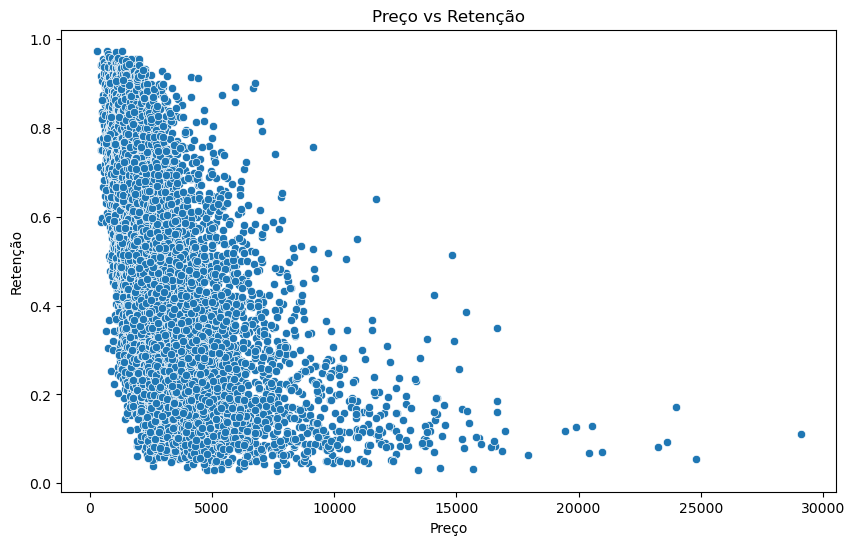

In [79]:
# Plot the data to visualize the relationship between price and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_lote_otim_atu, x='premio', y='prob_est')
plt.title('Preço vs Retenção')
plt.xlabel('Preço')
plt.ylabel('Retenção')
plt.show()

In [112]:
df_lote_otim = df_lote_otim_atu

In [3]:
df_lote_otim = df_lote_otim_atu.sample(n = 500) 
df_lote_otim.shape

NameError: name 'df_lote_otim_atu' is not defined

In [114]:
df_lote_otim["Margem Inicial"] = df_lote_otim["prob_est"]*(df_lote_otim["Premio_oferecido_com_batente"]-df_lote_otim["Act_cost"])

#########################################

In [1]:
%%time

def margem_esperada(premio,demanda_alvo):
    df_lote_otim["premio"]=premio
    demanda= model.predict(df_lote_otim)
    df_lote_otim["demanda_alvo"]=demanda_alvo
    custo= df_lote_otim["Act_cost"]
    margem_esperada = demanda * (premio-custo)
    margem_total = -np.sum(margem_esperada) 
    return margem_total

# restricão demanda alvo
def constraint(premio,demanda_alvo):
    df_lote_otim["premio"]=premio
    demanda= model.predict(df_lote_otim)
    demanda_alvo = df_lote_otim["demanda_alvo"]
    return  np.sum(demanda) - np.sum(demanda_alvo)


def constraint2(premio,demanda_alvo):
    margem_inicial = df_lote_otim["prob_est"]*(df_lote_otim["Premio_oferecido_com_batente"]-df_lote_otim["Act_cost"])
    df_lote_otim["premio"]=premio
    df_lote_otim["demanda"] = model.predict(df_lote_otim)
    demanda_alvo = df_lote_otim["demanda_alvo"]
    margem_otim = df_lote_otim["demanda"]*(df_lote_otim["premio"]-df_lote_otim["Act_cost"])
    return  np.sum(margem_otim) - np.sum(margem_inicial)


def constraint3(premio,demanda_alvo):
    lb = df_lote_otim["Premio_oferecido_com_batente"]*0.90
    return lb

def constraint4(premio,demanda_alvo):
    ub = df_lote_otim["Premio_oferecido_com_batente"]*1.1
    return ub
 
restr_demanda = {'type': 'eq', 'fun': constraint}   
restr_margem  = {'type': 'ineq', 'fun': constraint2} 
restr_lb = {'type': 'ineq', 'fun': constraint3}   
restr_ub  = {'type': 'ineq', 'fun': constraint4} 
 
#restricoes = ([restr_demanda,restr_margem,restr_lb,restr_ub])     

restricoes = ([restr_demanda,restr_margem])    

demanda_base_case = np.round(np.mean(df_lote_otim["prob_est"]),2)

demanda_alvo=0.55

premio_inicial = df_lote_otim["Premio_oferecido_com_batente"]*(demanda_base_case/demanda_alvo)
#premio_inicial = df_lote_otim["Premio_oferecido_com_batente"]
# limitando o premio fique dentro do range
bounds = [(0.9 * premio_base, premio_base*1.1) for premio_base in df_lote_otim["Premio_oferecido_com_batente"]]

# rodando a otimizaçao
result = minimize(margem_esperada,
                  premio_inicial,
                  args=(demanda_alvo), 
                  method = 'L-BFGS-B', 
                  tol=0.01,
                  constraints=restricoes,
                  bounds=bounds)



NameError: name 'np' is not defined

In [131]:
# premio otimizados
premio_otim = result.x
df_lote_otim["premio"]=result.x

df_lote_otim["demanda otimizada"] = model.predict(df_lote_otim)
df_lote_otim["Margem otimizada"] = df_lote_otim["demanda otimizada"]*(df_lote_otim["premio"]-df_lote_otim["Act_cost"])

In [ ]:
df_plot.groupby(['Amostra'])['prob_est'].mean()

In [ ]:
df_relatorio["per_com_pct"] = df_relatorio['per_com']/100
df_relatorio["premio_prob"] = df_relatorio["demanda otimizada"]*df_relatorio["premio"]
df_relatorio["Act_cost_prob"] = df_relatorio["demanda otimizada"]*df_relatorio["Act_cost"]                                                                
df_relatorio["comissao_valor"] = df_relatorio["per_com_pct"] *df_relatorio["premio"]
df_relatorio["comissao_valor_prob"] = df_relatorio["per_com_pct"] *df_relatorio["premio_prob"]


#criando a função

In [133]:
df_relatorio = df_lote_otim.copy()


In [134]:
apolice_ofertada  = np.round(df_relatorio.shape[0],0)
apolice_estimada  = np.round(np.sum(df_relatorio["demanda otimizada"]),0)
premio_ofertado   = np.mean(df_relatorio["premio"])
retencao_estimada = np.mean(df_relatorio["demanda otimizada"])
retencao_base_case = np.mean(df_relatorio["prob_est"])
premio_esperado   = np.sum(df_relatorio["premio_prob"])/np.sum(df_relatorio["demanda otimizada"])
risco_ofertado    = np.mean(df_relatorio["Act_cost"])
risco_esperado    = np.sum(df_relatorio["Act_cost_prob"])/np.sum(df_relatorio["demanda otimizada"])
sp_ofertado       = np.sum(df_relatorio["Act_cost"])/np.sum(df_relatorio["premio"])
sp_esperado       = np.sum(df_relatorio["Act_cost_prob"])/np.sum(df_relatorio["premio_prob"])
comis_ofertado    = np.sum(df_relatorio["comissao_valor"])/np.sum(df_relatorio["premio"])
comis_esperado    = np.sum(df_relatorio["comissao_valor_prob"])/np.sum(df_relatorio["premio_prob"])
ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749
print('Apolices Ofertadas: %s' % apolice_ofertada)
print('Apolices Renovadas: %s' % apolice_estimada)
print('premio_ofertado: %s' % np.round(premio_ofertado,2))
print('retencao_baseCase : %s' % np.round(retencao_base_case*100,2))
print('retencao_estimada : %s' % np.round(retencao_estimada*100,2))
print('premio_esperado" : %s'  %np.round( premio_esperado,2))
print('risco_ofertado" : %s'  %  np.round(risco_ofertado,2))
print('risco_esperado" : %s'  %  np.round(risco_esperado,2))
print('sp_ofertado" : %s'  % np.round(sp_ofertado*100,2))
print('sp_esperado" : %s'  % np.round(sp_esperado*100,2))
print('ic_ofertado" : %s'  % np.round(ic_ofertado*100,2))
print('ic_esperado" : %s'  % np.round(ic_esperado*100,2))

Apolices Ofertadas: 500
Apolices Renovadas: 264.0
premio_ofertado: 2736.78
retencao_baseCase : 46.77
retencao_estimada : 52.8
premio_esperado" : 2143.37
risco_ofertado" : 1903.29
risco_esperado" : 1288.0
sp_ofertado" : 69.54
sp_esperado" : 60.09
ic_ofertado" : 114.25
ic_esperado" : 103.3


In [136]:
prices_df = pd.DataFrame({
    'chave': df_relatorio["chave"],
    'Act_cost':  df_relatorio["Act_cost"],
    'Premio ofertado com batente':  df_relatorio["Premio_oferecido_com_batente"],
    'Optimized Prices': df_relatorio["premio"],
    'lb_bound' : [b[0] for b in bounds],
    'up_bound' : [b[1] for b in bounds],
    'prob_est':         df_relatorio["prob_est"],
    'renewal demand':df_relatorio["demanda otimizada"],
    'variação':df_relatorio["premio"]/df_relatorio["Premio_oferecido_com_batente"]
})
prices_df.head(20)

,chave,Act_cost,Premio ofertado com batente,Optimized Prices,lb_bound,up_bound,prob_est,renewal demand,variação
23311,453500016553100001,3668.600477,5868.821752,5282.000695,5281.939577,6455.703927,0.142834,0.182620,0.900010
10995,612700411093100001,955.204208,2010.532956,1810.230547,1809.479660,2211.586252,0.851230,0.886673,0.900373
16435,715900060503100001,1367.021431,2603.354467,2343.275137,2343.019020,2863.689914,0.433212,0.495253,0.900098
9113,11100379113100001,968.898103,1684.747179,1516.816708,1516.272461,1853.221897,0.661810,0.716081,0.900323
17277,284300053253100001,1369.301291,2882.132794,2594.175631,2593.919515,3170.346073,0.500557,0.575459,0.900089
2232,85600111823100001,884.275434,1414.614356,1273.286799,1273.152920,1556.075792,0.251277,0.309452,0.900095
11054,53009389883100001,1208.631902,1933.501682,1740.756880,1740.151514,2126.851850,0.692624,0.746274,0.900313
6385,603500376553100001,830.846628,1582.263622,1424.508747,1424.037260,1740.489984,0.627205,0.685215,0.900298
20721,33043268443100001,1702.175503,3241.621602,2917.785408,2917.459442,3565.783762,0.504146,0.568194,0.900101
10225,335509039163100001,1394.731502,2231.213409,2008.397662,2008.092068,2454.334750,0.439577,0.513273,0.900137


########

In [143]:
# premio otimizados
premio_otim = result.x
print(result.message)
print(result.success)
df_lote_otim["premio"]=result.x

df_lote_otim["demanda otimizada"] = model.predict(df_lote_otim)
df_lote_otim["Margem otimizada"] = df_lote_otim["demanda otimizada"]*(df_lote_otim["premio"]-df_lote_otim["Act_cost"])

print(np.mean(df_lote_otim["Premio_oferecido_com_batente"]))
print(np.mean(df_lote_otim["premio"]))
print(np.mean(df_lote_otim["Margem Inicial"]))
print(np.mean(df_lote_otim["Margem otimizada"]))
print(np.mean(df_lote_otim["prob_est"]))
print(np.mean(df_lote_otim["demanda otimizada"]))

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
True
3040.4790782339996
2736.782124799197
451.65942670069586
388.8224096503719
0.46771251654701623
0.5280263702202987


In [ ]:
df_plot = df_lote_otim[["prob_est","premio","Amostra"]].copy()
df_plot.dtypes


True

In [ ]:
#df_plot["range_preco"] = list(range(np.min(df_plot["premio"].astype('int')), np.max(df_plot["premio"].astype('int')), 500))



In [ ]:
#plt.figure(figsize=(9,6))
#plt.plot(preco, np.mean(prices_df['renewal demand']), color='grey')
#plt.xlabel('Preço')
#plt.ylabel('Renovação');
#plt.title('Preço Renov');

In [129]:
print(np.mean(df_lote_otim["Premio_oferecido_com_batente"]))
print(np.mean(df_lote_otim["premio"]))
print(np.mean(df_lote_otim["Margem Inicial"]))
print(np.mean(df_lote_otim["Margem otimizada"]))
print(np.mean(df_lote_otim["prob_est"]))
print(np.mean(df_lote_otim["demanda otimizada"]))


3040.4790782339996
2736.782124799197
451.65942670069586
388.8224096503719
0.46771251654701623
0.5280263702202987


In [ ]:
prices_df["variação"].describe()

In [8]:
np.arange(100,1000,step=50)

array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])